# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [256]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_combined = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_combined.to_csv("mouse combined data.csv", index=False)
mouse_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [192]:
# Checking the number of mice.
mice_count = len(mouse_combined["Mouse ID"].unique())
mice_count

249

In [193]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_df = mouse_combined[mouse_combined.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse = duplicate_mouse_df["Mouse ID"].unique()
print(duplicate_mouse)

['g989']


In [194]:
# Optional: Get all the data for the duplicate mouse ID. 
#duplicate_mouse_info = mouse_combined.groupby("Mouse ID")
duplicate_mouse_info = mouse_combined.loc[mouse_combined["Mouse ID"] == duplicate_mouse[0]]
duplicate_mouse_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [195]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#duplicates = mouse_combined[mouse_combined.duplicated()]
#row_index = duplicates.index

#clean_mouse_combined = mouse_combined.drop(row_index)
#clean_mouse_combined.head()

clean_mouse_combined = mouse_combined[mouse_combined["Mouse ID"] != duplicate_mouse[0]]
clean_mouse_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [196]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_mouse_combined["Mouse ID"].unique())
clean_mice_count

248

In [197]:
drug_and_tumor_df = clean_mouse_combined[["Drug Regimen", "Tumor Volume (mm3)"]]
drug_and_tumor_df.head()

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729


## Summary Statistics

In [198]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_volume_mean = drug_and_tumor_df.groupby("Drug Regimen").mean()
tumor_volume_mean.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"}, inplace=True)

tumor_volume_median = drug_and_tumor_df.groupby("Drug Regimen").median()
tumor_volume_median.rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume"}, inplace=True)

tumor_volume_variance = drug_and_tumor_df.groupby("Drug Regimen").var()
tumor_volume_variance.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"}, inplace=True)

tumor_volume_stdev = drug_and_tumor_df.groupby("Drug Regimen").std()
tumor_volume_stdev.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Dev."}, inplace=True)

tumor_volume_sem = pd.DataFrame(drug_and_tumor_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(st.sem))
tumor_volume_sem.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Err."}, inplace=True)

# Assemble the resulting series into a single summary DataFrame.

drug_and_tumor_stats_df = pd.merge(tumor_volume_mean, tumor_volume_median, on="Drug Regimen") \
                            .merge(tumor_volume_variance, on= "Drug Regimen") \
                            .merge(tumor_volume_stdev, on="Drug Regimen") \
                            .merge( tumor_volume_sem, on="Drug Regimen")

drug_and_tumor_stats_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [199]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

#the values under quotes "mean", "median", "var", "std" - need to be lower case bc that is how the .agg() recognizes them

drug_and_tumor_summary_stats_df = clean_mouse_combined.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean = "mean",
    Median = "median",
    Variance = "var",
    Std_Deviation="std",
    #had to chapgpt for the below.
    sem=lambda x: st.sem(x, ddof=0)).reset_index()

# Using the aggregation method, produce the same summary statistics in a single line
drug_and_tumor_summary_stats_df

,Drug Regimen,Mean,Median,Variance,Std_Deviation,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.514977


## Bar and Pie Charts

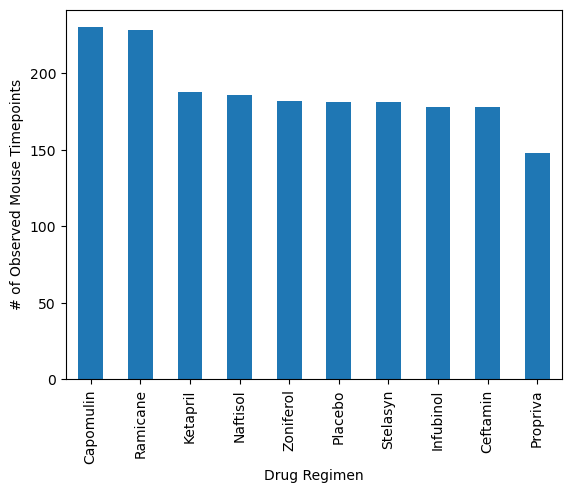

In [200]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#x_values = clean_mouse_combined["Drug Regimen"].unique()
drug_and_counts = pd.DataFrame(clean_mouse_combined["Drug Regimen"].value_counts()).reset_index()

drug_and_counts.plot(x="Drug Regimen", y="count", kind="bar", legend=False)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

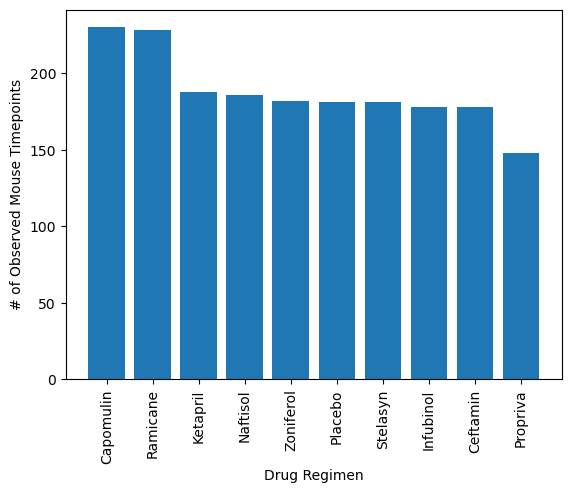

In [201]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_value = drug_and_counts["Drug Regimen"]
y_value = drug_and_counts["count"]

plt.bar(x_value, y_value)
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.show()

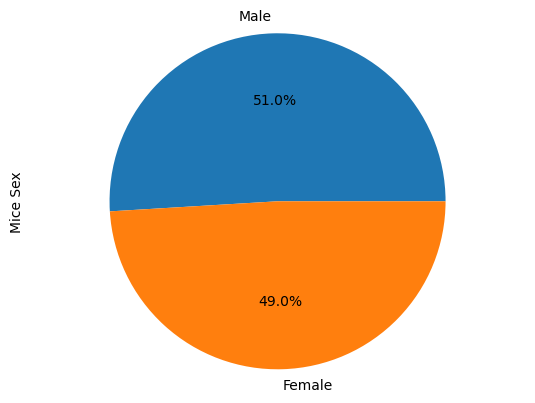

In [202]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female = pd.DataFrame(clean_mouse_combined["Sex"].value_counts()).reset_index()
male_female.rename(columns={"count":"Mice Sex"}, inplace=True)
male_female["Mice Sex"].plot.pie(autopct="%1.1f%%", labels=male_female["Sex"])
plt.axis("equal")
plt.show()

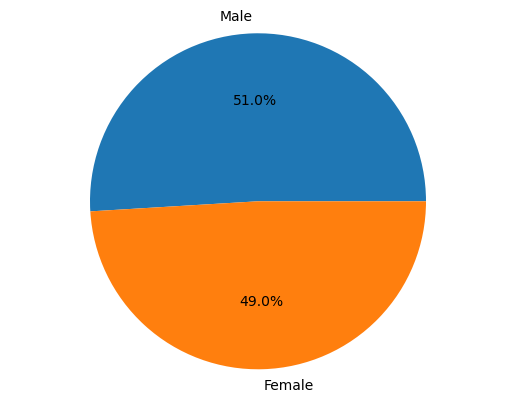

In [203]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(male_female["Mice Sex"], labels=male_female["Sex"], autopct="%1.1f%%")

plt.axis("equal")

plt.show()


## Quartiles, Outliers and Boxplots

In [330]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]

final_data_results = pd.DataFrame()

for drug in regimens:
    data_df = clean_mouse_combined[clean_mouse_combined["Drug Regimen"] == drug]
    final_data_results = pd.concat([final_data_results, data_df], axis=0)
#final_data_results.heads()

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_per_mouse = pd.DataFrame(final_data_results.groupby("Mouse ID")["Timepoint"].max())
#greatest_timepoint_per_mouse.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(greatest_timepoint_per_mouse, final_data_results, on=["Mouse ID", "Timepoint"], how="left")
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [355]:
# Put treatments into a list for for loop (and later for plot labels)

#already did it above, created the "regimens" list
#regimens = ["Capomulin","Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
first_quartile_per_drug = final_tumor_volume.groupby("Drug Regimen")["Tumor Volume (mm3)"].quantile(0.25)
third_quartile_per_drug = final_tumor_volume.groupby("Drug Regimen")["Tumor Volume (mm3)"].quantile(0.75)

IQR = third_quartile_per_drug - first_quartile_per_drug

lower_bound_per_drug = first_quartile_per_drug - (1.5 * IQR)
upper_bound_per_drug = third_quartile_per_drug + (1.5 * IQR)
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

for drug in regimens:
    outlier = (final_tumor_volume["Drug Regimen"] == drug) & ((final_tumor_volume["Tumor Volume (mm3)"] < lower_bound_per_drug[drug]) |
                                                              (final_tumor_volume["Tumor Volume (mm3)"] > upper_bound_per_drug[drug]))
    value = final_tumor_volume.loc[outlier,"Tumor Volume (mm3)"]
    tumor_vol[drug] = value

tumor_vol

#tumor_vol_df = pd.DataFrame(tumor_vol)
#tumor_vol_df

{'Capomulin': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Ramicane': Series([], Name: Tumor Volume (mm3), dtype: float64),
 'Infubinol': 15    36.321346
 Name: Tumor Volume (mm3), dtype: float64,
 'Ceftamin': Series([], Name: Tumor Volume (mm3), dtype: float64)}

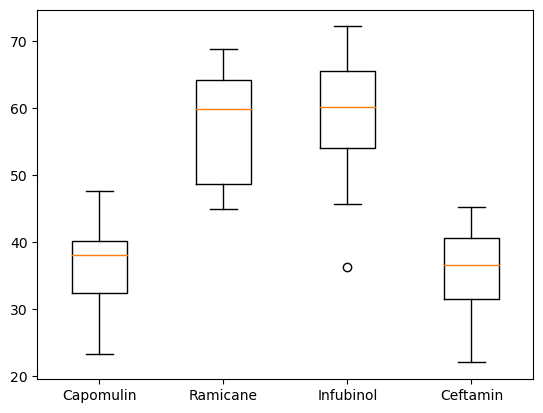

In [379]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data_to_plot = final_tumor_volume.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)
#data_to_plot_series
plt.boxplot(data_to_plot, labels=regimens)
plt.show()

#final_tumor_volume.boxplot(column="Tumor Volume (mm3)", by= "Drug Regimen")
#plt.show()

## Line and Scatter Plots

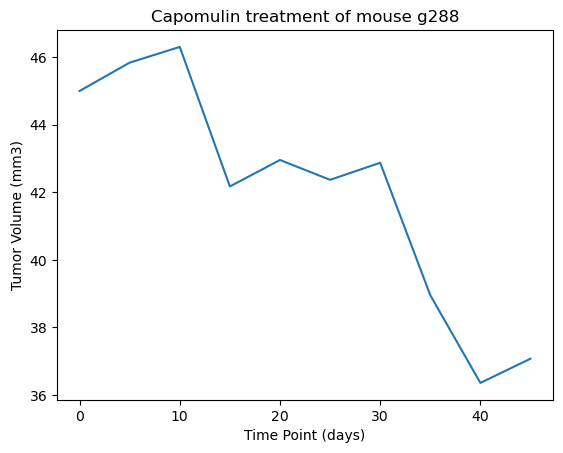

In [398]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = final_data_results[final_data_results["Drug Regimen"] == "Capomulin"]
mouse_id_df = capomulin_df[capomulin_df["Mouse ID"] == "g288"]

plt.plot(mouse_id_df["Timepoint"], mouse_id_df["Tumor Volume (mm3)"])
plt.title(f"Capomulin treatment of mouse g288")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

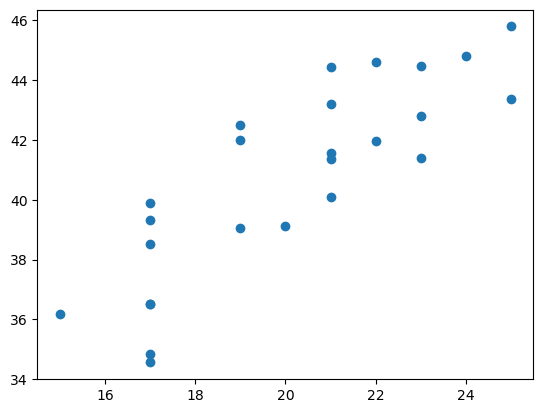

In [407]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_volume_df = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].first()
plt.scatter(mouse_weight, avg_volume_df)
plt.show()

## Correlation and Regression

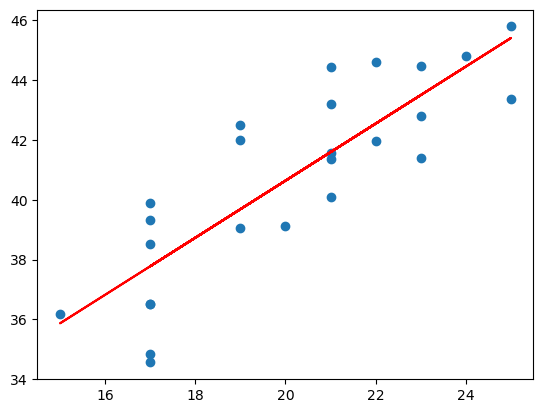

Correlation coeficient: 0.84


In [421]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#y = mx + b
avg_volume_df = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].first()

weight_and_avg_df = pd.concat([mouse_weight,avg_volume_df], axis=1)
correlation = round(weight_and_avg_df["Weight (g)"].corr(weight_and_avg_df["Tumor Volume (mm3)"]),2)

slope, intercept, r_value, p_value, std_err = st.linregress(weight_and_avg_df['Weight (g)'], weight_and_avg_df['Tumor Volume (mm3)'])

plt.scatter(weight_and_avg_df['Weight (g)'], weight_and_avg_df['Tumor Volume (mm3)'])
plt.plot(weight_and_avg_df['Weight (g)'], slope * weight_and_avg_df['Weight (g)'] + intercept, color="red")
plt.show()
print(f"Correlation coeficient: {correlation}")